<a href="https://colab.research.google.com/github/Mwangi-Gichuki/origin/blob/master/DSC4_WEEK21P_MICHAEL_GICHUKI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries to be used for the Analysis

In [ ]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import scipy.stats as st

 **Univariate Analysis**

1. Defining the Question

**a.Specifying the Question**

What is the most common Job type in the region



2. Loading the Data

In [ ]:
# Dataset url =  http://bit.ly/FinancialDataset

df = pd.read_csv("http://bit.ly/FinancialDataset")

# To display the top 5 rows
df.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# To display the bottom 5 rows
df.tail(5) 

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


3.Checking the Data

In [ ]:
# Checking the data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
# Total number of rows and columns
df.shape

(23524, 13)

In [ ]:
# Dropping irrelevant columns
df = df.drop('uniqueid', axis=1)
df.head(5)

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Renaming the column names
df = df.rename(columns={"Has a Bank account": "Has_a_Bank_account", "Type of Location": "Type_of_Location", "Cell Phone Access": "Cell_Phone_Access", "Respondent Age": "Respondent_Age","The relathip with head": "The_relationship_with_head", "Level of Educuation": "Level_of_Educuation", "Type of Job": "Type_of_Job" })
df.head(5)

,country,year,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,The_relationship_with_head,marital_status,Level_of_Educuation,Type_of_Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (4373, 12)


In [ ]:
# Finding the null values.
print(df.isnull().sum())

country                       14
year                           0
Has_a_Bank_account            36
Type_of_Location              15
Cell_Phone_Access             11
household_size                28
Respondent_Age                34
gender_of_respondent          34
The_relationship_with_head     4
marital_status                32
Level_of_Educuation           29
Type_of_Job                   30
dtype: int64


In [ ]:
# Dropping the missing values.
df = df.dropna() 
df.count()

country                       23343
year                          23343
Has_a_Bank_account            23343
Type_of_Location              23343
Cell_Phone_Access             23343
household_size                23343
Respondent_Age                23343
gender_of_respondent          23343
The_relationship_with_head    23343
marital_status                23343
Level_of_Educuation           23343
Type_of_Job                   23343
dtype: int64

4. External Data Source Validation

The data can be validate against the following data sets:

[FinAccess Kenya 2018.](https://fsdkenya.org/publication/finaccess2019/)

[Finscope Rwanda 2016](http://www.statistics.gov.rw/publication/finscope-rwanda-2016)

[Finscope Tanzania 2017](http://www.fsdt.or.tz/finscope/)

[Finscope Uganda 2018](http://fsduganda.or.ug/finscope-2018-survey-report/)

5. Tidying the Dataset

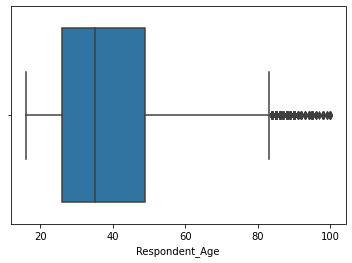

In [ ]:
# Checking for outliers in the respondents age.
# 
sns.boxplot(x=df['Respondent_Age'])


Outliers observed are normal in an age dataset

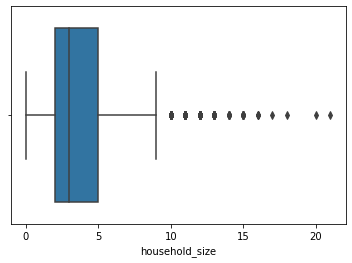

In [ ]:
# Checking for outliers in the household_size	

sns.boxplot(x=df['household_size'])

Outliers observed are normal in an household dataset

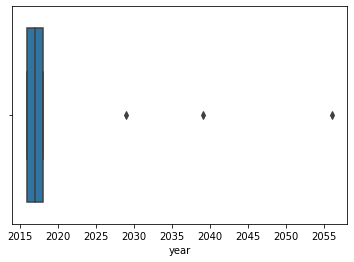

In [ ]:
sns.boxplot(x=df['year'])
# Outliers noted are not in line with the description of the data and should therefore be dropped.

In [ ]:
#Dealing with the outliers observed in the year column
index = df[(df['year'] >= 2020)|(df['year'] <= 2013)].index
df.drop(index, inplace=True)
df['year'].describe()

count    15183.000000
mean      2016.428110
std          0.494821
min       2016.000000
25%       2016.000000
50%       2016.000000
75%       2017.000000
max       2017.000000
Name: year, dtype: float64

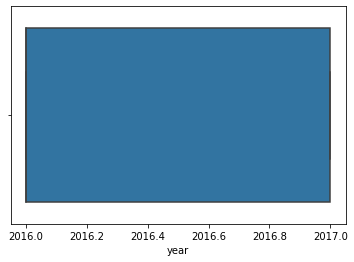

In [ ]:
sns.boxplot(x=df['year'])

6. Exploratory Analysis

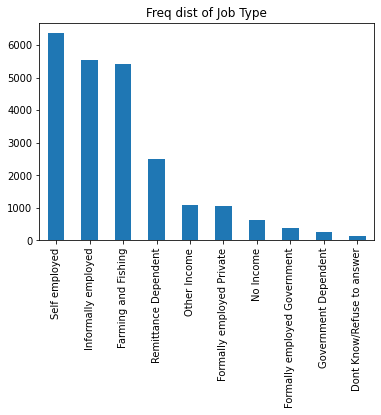

In [ ]:
# Plotting a Histogram
df['Type_of_Job'].value_counts().plot.bar(title='Freq dist of Job Type')

The most common type observed from the respondents is "self employed"

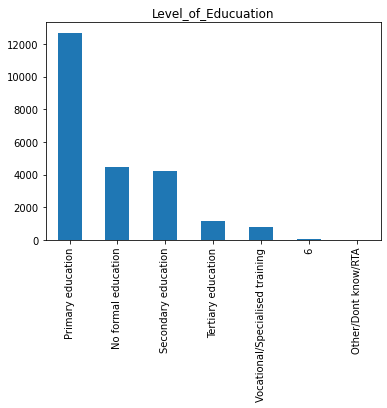

In [ ]:
df['Level_of_Educuation'].value_counts().plot.bar(title='Freq dist Level of Educuation')

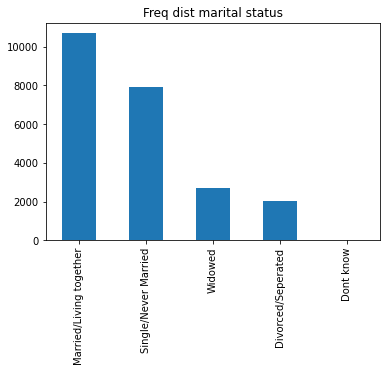

In [ ]:
df['marital_status'].value_counts().plot.bar(title='Freq dist marital status')

In [ ]:
#Mean, mode,median and quartile for age 
df['Respondent_Age'].describe()

count    23343.000000
mean        38.805509
std         16.519803
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: Respondent_Age, dtype: float64

In [ ]:
#Mean, mode,median and quartile for Household size
df['household_size'].describe()


count    23343.000000
mean         3.688643
std          2.281184
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

In [ ]:
df["Respondent_Age"].median() 

35.0

In [ ]:
# 
df.Has_a_Bank_account.value_counts()

No     20046
Yes     3297
Name: Has_a_Bank_account, dtype: int64

In [ ]:
df.Cell_Phone_Access.value_counts()

Yes    17334
No      6009
Name: Cell_Phone_Access, dtype: int64

**Bivariate Analysis**

Specifying the question

Is there a relationship between the age of the respondent and the size of the household


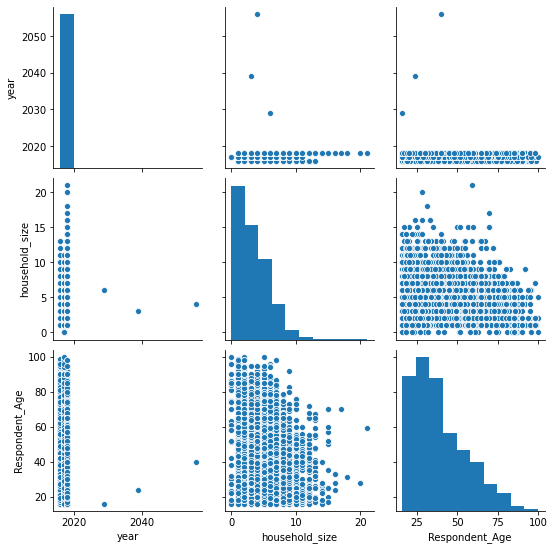

In [ ]:
sns.pairplot(df)
plt.show()

No correlation is observed between household size and respondent age as the points are scattered throughout the graph


In [ ]:
# Calculating the pearson coefficient
df["Respondent_Age"].corr(df["household_size"]) 

-0.11970919507762415

There is weak negative correlation between the respodents age and the size of their family 


**Multivariate Analysis**